In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/StudentsPerformance.csv")

In [3]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
422,female,group D,master's degree,free/reduced,completed,47,58,67
959,male,group C,high school,standard,none,75,81,71
441,female,group D,high school,standard,none,78,81,80
727,male,group E,some high school,standard,completed,68,51,57
896,male,group B,high school,free/reduced,none,36,29,27


In [4]:
df1=df.iloc[:,5:]

In [5]:
df1

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [6]:
df1.isnull().sum()

,0
math score,0
reading score,0
writing score,0


<Axes: xlabel='math score', ylabel='reading score'>

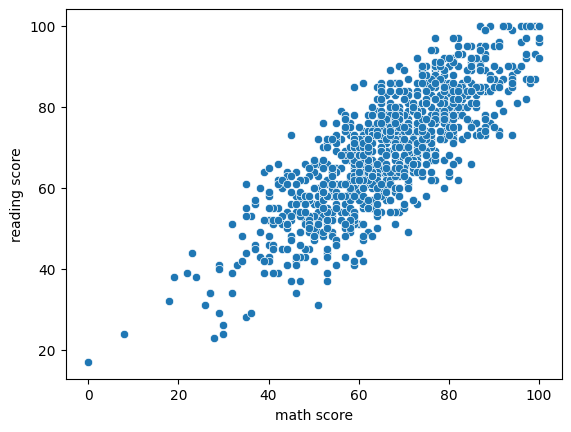

In [11]:
sns.scatterplot(df1,x='math score',y='reading score')

In [15]:
x = df1.drop(['writing score', 'reading score'], axis=1)
y = df['writing score']

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
model=LinearRegression()
model.fit(xtrain,ytrain)


LinearRegression()

In [32]:
ypred=model.predict(xtest)

In [33]:
ytte=pd.DataFrame({'Actual':ytest,'Predicted':ypred})

In [34]:
ytte

,Actual,Predicted
521,84,88.198166
737,73,57.582738
740,72,79.335805
660,73,74.501790
411,78,82.558482
...,...,...
408,56,56.777068
332,53,64.833760
208,76,74.501790
613,74,67.250768


<Axes: xlabel='math score', ylabel='writing score'>

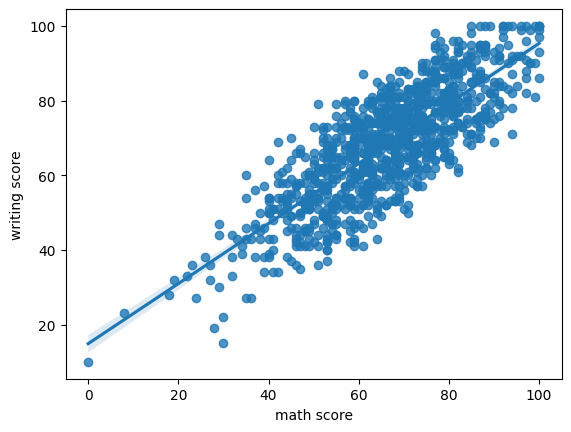

In [35]:
#drawning regression lines with detail before and after of regression
sns.regplot(x='math score',y='writing score',data=df1)

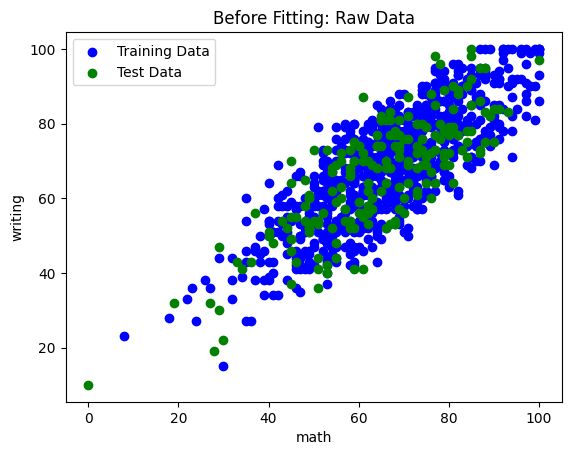

In [36]:
plt.scatter(xtrain, ytrain, color='blue', label='Training Data')
plt.scatter(xtest, ytest, color='green', label='Test Data')
plt.xlabel("math")
plt.ylabel("writing")
plt.title("Before Fitting: Raw Data")
plt.legend()


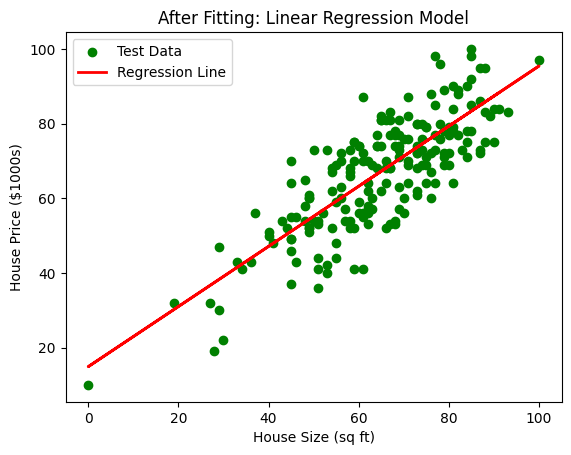

In [ ]:

plt.scatter(xtest, ytest, color='green', label='Test Data')
plt.plot(xtest, ypred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("math)")
plt.ylabel("writing")
plt.title("After Fitting: Linear Regression Model")
plt.legend()